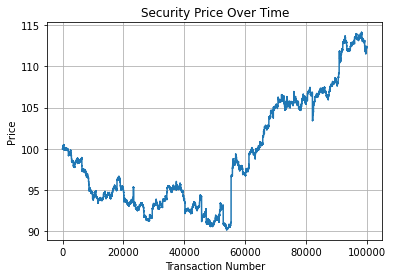

In [85]:
import matplotlib.pyplot as plt
import numpy as np

class Market:
    def __init__(self, initial_price, liquidity):
        """
        Initialize the market with an initial price and liquidity.
        
        :param initial_price: The starting price of the security.
        :param liquidity: A parameter controlling how much the price is affected by trades.
                          Higher liquidity means smaller price changes.
        """
        self.price = initial_price
        self.liquidity = liquidity
        self.history = [initial_price]

    def buy(self, shares):
        """
        Simulate a buy order.
        
        :param shares: The number of shares bought.
        """
        # Buying increases the price
        price_impact = shares / self.liquidity
        self.price *= 1 + price_impact
        self.history.append(self.price)

    def sell(self, shares):
        """
        Simulate a sell order.
        
        :param shares: The number of shares sold.
        """
        price_impact = shares / self.liquidity
        self.price *= 1 - price_impact
        self.history.append(self.price)

    def get_price(self):
        return self.price
        
    def get_liquidity(self):
        return self.liquidity  

    def plot_price_history(self):
        """
        Plot the price history to visualize the effect of trades on the security's price.
        """
        plt.plot(self.history)
        plt.title("Security Price Over Time")
        plt.xlabel("Transaction Number")
        plt.ylabel("Price")
        plt.grid(True)
        plt.show()

initial_price = 100
liquidity     = 1_000_000

market = Market(initial_price, liquidity)

# np.random.seed(1)
num_trades  = 100_000
trade_sizes = np.ceil(np.random.lognormal(2, 2, num_trades)) #TODO: investigate distribution of buy/sell order sizes
buy_or_sell = np.random.choice(['buy', 'sell'], num_trades)

for i in range(num_trades):
    if buy_or_sell[i] == 'buy':
        market.buy(trade_sizes[i])
    else:
        market.sell(trade_sizes[i])

market.plot_price_history()


In [44]:
l = market.get_liquidity()

market.sell(l / 10)
# market.buy(l / 10)


print(market.get_price())
print(market.get_liquidity())

76.87411632521875
1000
